# Step 1 : Image load

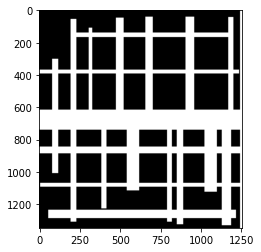

In [12]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
import os
img = mpimg.imread("../data/input/dummy_data/dummy_streets.png")
plt.imshow(img)
plt.show()
#mpimg.imsave("resultat.png", img) # Save result

# Step 2 : Creation of the cost matrix

In [13]:
img_int = np.zeros((img.shape[0],img.shape[1],1))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j][0] == 1 and img[i][j][1] == 1 and img[i][j][2] == 1 :
            img_int[i][j] = 1
        else:
            img_int[i][j] = 1001
print("format img_int ",img_int.shape )
print("format img ",img.shape )
print("Value of a black pixel, image ",img[600][750])
print("Value of a black pixel, image int ",img_int[600][750])
print("Value of a white pixel, image ",img[1000][1250])
print("Value of a white pixel, image int ",img_int[1000][1250])

format img_int  (1346, 1254, 1)
format img  (1346, 1254, 3)
Value of a black pixel, image  [0. 0. 0.]
Value of a black pixel, image int  [1001.]
Value of a white pixel, image  [1. 1. 1.]
Value of a white pixel, image int  [1.]


# Etape 3 : Problem settings
### 	Creation of the course graph
###	    Initialization of the neighbors

In [15]:
import numpy as np

# Problem settings
initial_autonomy = 900
initial_position =( 700,300)
environment_copy = img_int
environment = img_int
ancient_neighbors = []
distance = 100*np.ones((img_int.shape[0],img_int.shape[1]))

# Settings of the zone and of the moves matrix
distance[initial_position] = initial_autonomy

#Initialization of the 8 neighbors
neighbors = []
primary_move = [(0,1),(1,1),(1,0),(1,-1),(0,-1),(-1,-1),(-1,0),(-1,1)]
for i in primary_move :
    neighbors.append((initial_position[0]+i[0],initial_position[1]+i[1]))
    ancient_neighbors.append((initial_position[0]+i[0],initial_position[1]+i[1]))
print("Neighbors ",neighbors)
   
neighbors=[initial_position]
print(neighbors)

def display():
    print("       Environment:\n", environment)
    print("            Distance:\n", distance)
    print("Neighbors: ", neighbors)
    return()



Neighbors  [(700, 301), (701, 301), (701, 300), (701, 299), (700, 299), (699, 299), (699, 300), (699, 301)]
[(700, 300)]


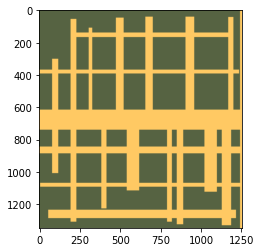

In [16]:
img_colorized = np.zeros((img.shape[0],img.shape[1],3))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j][0] == 1 and img[i][j][1] == 1 and img[i][j][2] == 1 : # white
            img_colorized[i][j][0] = 1
            img_colorized[i][j][1] = 0.79
            img_colorized[i][j][2] = 0.39 # sand
        else: # black
            img_colorized[i][j][0] = 0.34
            img_colorized[i][j][1] = 0.39
            img_colorized[i][j][2] = 0.26 # dark green
plt.imshow(img_colorized)
plt.show()

# Step 4 : Graph skim

In [17]:
initial_summit = neighbors[0]



while len(neighbors) > 0 :
    
    #  1-Take an initial position on the graph
    #  2-Choose the first summit in the stack
    #  3-Annotate the neighbors of this summit
    #    a) For each neighbor of this summit : 
    #      - It is part of the boundary = > nothing to do
    #      - It is unknown => calculate the movement; add it to the boundary, remove from the boundary list
    
    initial_summit = neighbors[0]
    for i in primary_move :
        if (0 <= initial_summit[0]+i[0] <= distance.shape[0]) and (0 <= initial_summit[1]+i[1] <= distance.shape[1]) :
            # Check whether the target summit does not go out of the map
            target_summit=((initial_summit[0]+i[0],initial_summit[1]+i[1]))
            if distance[target_summit] == 100 : # unknown summit
                if distance[initial_summit]-environment[target_summit]>=0 : # possible move
                    distance[target_summit] = distance[initial_summit]-environment[target_summit]
                    img_colorized[target_summit][0] = 1
                    img_colorized[target_summit][1] = 0
                    img_colorized[target_summit][2] = 0 # red
                    if target_summit not in neighbors :
                        neighbors.append(target_summit)
                        ancient_neighbors.append(target_summit)

    
    
    if initial_summit in neighbors : 
        neighbors.remove(initial_summit)

print("Graph skimmed")



Graph skimmed


# Step 5 : Display of the moves matrix

<function matplotlib.pyplot.show(close=None, block=None)>

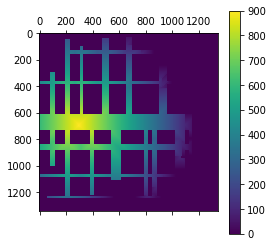

In [18]:
from matplotlib import pyplot as plt
my_matrix = np.zeros((img_int.shape[0],img_int.shape[0]))
for i in range(distance.shape[0]-100):
    for j in range(distance.shape[1]-100):
        if distance[i][j]==100 :
            my_matrix[i][j]=0
        else:
            my_matrix[i][j]=(distance[i][j])

im1 = plt.matshow(my_matrix)
plt.colorbar(im1)
plt.show

# Step 6 : Coloring of the initial image

# Step 7 : Isochrone display

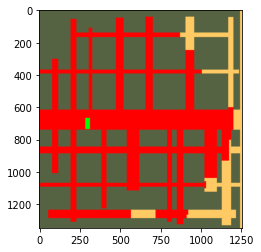

In [19]:
img_iso = img_colorized
for i in range(img_colorized.shape[0]-100):
    for j in range(img_colorized.shape[1]-100):
        #if 1 < my_matrix[i][j] < 5 : 
            #img_iso[i][j][0] = max(1,img_iso[i][j][0] + (my_matrix[i][j]/initial_autonomy))/2
            #img_iso[i][j][1] = img_iso[i][j][1]/10
            #img_iso[i][j][2] = img_iso[i][j][2]/10
            # Isochrone curve
        if initial_position[0]*0.95 < i < initial_position[0]*1.05 and initial_position[1]*0.95 < j < initial_position[1]*1.05 :
            img_iso[i][j][0] = 0
            img_iso[i][j][1] = 1
            img_iso[i][j][2] = 0
            # Initial red point
plt.imshow(img_iso)
plt.show()

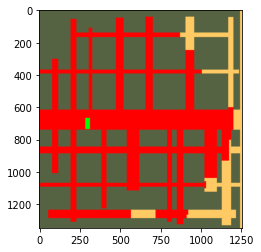

In [20]:
plt.imshow(img_colorized)